<a href="https://colab.research.google.com/github/Doclikam/Capstone-project-Stroke-Risk-Factors/blob/main/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
semiconductors=pd.read_csv('/content/chip_dataset (1).csv', parse_dates=True)

In [ ]:
semiconductors

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [ ]:
semiconductors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [ ]:
semiconductors.shape

(4945, 13)

In [ ]:
semiconductors.tail(50)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4895,NVIDIA GeForce RTX 4070,GPU,4/12/23,5,200,294,35800,1920.0,TSMC,NVIDIA,29150.0,29150.0,455.40
4896,NVIDIA GeForce RTX 4070 Max-Q,GPU,1/3/23,5,35,188,22900,735.0,TSMC,NVIDIA,11340.0,11340.0,177.10
4897,NVIDIA GeForce RTX 4070 Mobile,GPU,1/3/23,5,115,188,22900,1395.0,TSMC,NVIDIA,15620.0,15620.0,244.10
4898,NVIDIA GeForce RTX 4070 Ti,GPU,1/3/23,5,285,294,35800,2310.0,TSMC,NVIDIA,40090.0,40090.0,626.40
4899,NVIDIA GeForce RTX 4080 Max-Q,GPU,1/3/23,5,60,294,35800,795.0,TSMC,NVIDIA,20040.0,20040.0,313.20
4900,NVIDIA GeForce RTX 4080 Mobile,GPU,1/3/23,5,110,294,35800,1290.0,TSMC,NVIDIA,24720.0,24720.0,386.30
4901,NVIDIA GeForce RTX 4080 Ti,GPU,NaN,5,400,609,76300,2100.0,TSMC,NVIDIA,67580.0,67580.0,1056.00
4902,NVIDIA GeForce RTX 4090 D,GPU,12/28/23,5,425,609,76300,2280.0,TSMC,NVIDIA,73540.0,73540.0,1149.00
4903,NVIDIA GeForce RTX 4090 Max-Q,GPU,1/3/23,5,80,379,45900,930.0,TSMC,NVIDIA,28310.0,28310.0,442.30
4904,NVIDIA GeForce RTX 4090 Mobile,GPU,1/3/23,5,120,379,45900,1335.0,TSMC,NVIDIA,32980.0,32980.0,515.30


# **finding missing or duplicated data**

In [ ]:
semiconductors.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

<Axes: >

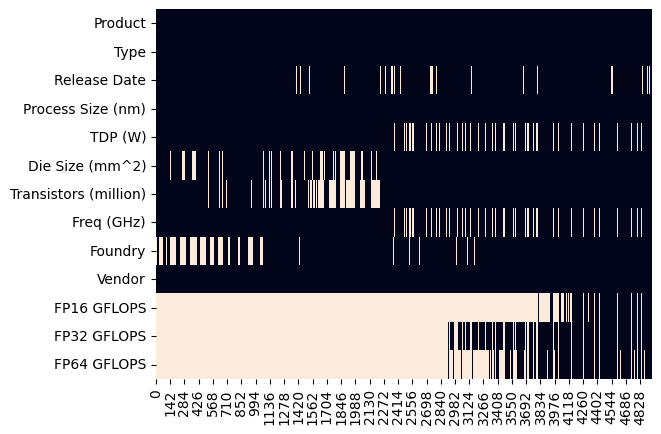

In [ ]:
ax=plt.axes()
sns.heatmap(semiconductors.isna().transpose(), cbar=False, ax=ax)

In [ ]:
semiconductors=semiconductors.drop(columns=['FP16 GFLOPS', 'FP32 GFLOPS','FP64 GFLOPS'])

In [ ]:
semiconductors=semiconductors.replace('unknown',np.NaN)

In [ ]:
semiconductors.tail(50)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
4895,NVIDIA GeForce RTX 4070,GPU,4/12/23,5,200,294,35800,1920.0,TSMC,NVIDIA
4896,NVIDIA GeForce RTX 4070 Max-Q,GPU,1/3/23,5,35,188,22900,735.0,TSMC,NVIDIA
4897,NVIDIA GeForce RTX 4070 Mobile,GPU,1/3/23,5,115,188,22900,1395.0,TSMC,NVIDIA
4898,NVIDIA GeForce RTX 4070 Ti,GPU,1/3/23,5,285,294,35800,2310.0,TSMC,NVIDIA
4899,NVIDIA GeForce RTX 4080 Max-Q,GPU,1/3/23,5,60,294,35800,795.0,TSMC,NVIDIA
4900,NVIDIA GeForce RTX 4080 Mobile,GPU,1/3/23,5,110,294,35800,1290.0,TSMC,NVIDIA
4901,NVIDIA GeForce RTX 4080 Ti,GPU,NaN,5,400,609,76300,2100.0,TSMC,NVIDIA
4902,NVIDIA GeForce RTX 4090 D,GPU,12/28/23,5,425,609,76300,2280.0,TSMC,NVIDIA
4903,NVIDIA GeForce RTX 4090 Max-Q,GPU,1/3/23,5,80,379,45900,930.0,TSMC,NVIDIA
4904,NVIDIA GeForce RTX 4090 Mobile,GPU,1/3/23,5,120,379,45900,1335.0,TSMC,NVIDIA


In [ ]:
new_semiconductors=semiconductors.dropna(thresh=0.7*len(semiconductors), axis=1)

In [ ]:
new_semiconductors=new_semiconductors.dropna(axis=0, how='any')

In [ ]:
new_semiconductors.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
16,Intel Pentium 4 1.4,CPU,11/20/00,180,55,217,42,1400.0,Intel,Intel
17,Intel Pentium 4 1.5,CPU,11/20/00,180,58,217,42,1500.0,Intel,Intel
18,Intel Pentium III 1133,CPU,7/31/00,180,29,80,44,1133.0,Intel,Intel
19,Intel Pentium III Xeon 1000 2.8V,CPU,8/25/00,180,30,106,28,1000.0,Intel,Intel
20,Intel Pentium III Xeon 1000 5V-12V,CPU,8/25/00,180,31,106,28,1000.0,Intel,Intel


In [ ]:
new_semiconductors.reset_index(drop=True, inplace=True)

In [ ]:
new_semiconductors.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,Intel Pentium 4 1.4,CPU,11/20/00,180,55,217,42,1400.0,Intel,Intel
1,Intel Pentium 4 1.5,CPU,11/20/00,180,58,217,42,1500.0,Intel,Intel
2,Intel Pentium III 1133,CPU,7/31/00,180,29,80,44,1133.0,Intel,Intel
3,Intel Pentium III Xeon 1000 2.8V,CPU,8/25/00,180,30,106,28,1000.0,Intel,Intel
4,Intel Pentium III Xeon 1000 5V-12V,CPU,8/25/00,180,31,106,28,1000.0,Intel,Intel


In [ ]:
new_semiconductors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                2702 non-null   object 
 1   Type                   2702 non-null   object 
 2   Release Date           2702 non-null   object 
 3   Process Size (nm)      2702 non-null   object 
 4   TDP (W)                2702 non-null   object 
 5   Die Size (mm^2)        2702 non-null   object 
 6   Transistors (million)  2702 non-null   object 
 7   Freq (GHz)             2702 non-null   float64
 8   Foundry                2702 non-null   object 
 9   Vendor                 2702 non-null   object 
dtypes: float64(1), object(9)
memory usage: 211.2+ KB


In [ ]:
semiconductors.duplicated().sum()

87

# **Transform temporal data to their corrrect format**

In [ ]:
new_semiconductors.dtypes

Product                   object
Type                      object
Release Date              object
Process Size (nm)         object
TDP (W)                   object
Die Size (mm^2)           object
Transistors (million)     object
Freq (GHz)               float64
Foundry                   object
Vendor                    object
dtype: object

In [ ]:
new_semiconductors[['TDP (W)','Transistors (million)']].astype('float')

,TDP (W),Transistors (million)
0,55.0,42.0
1,58.0,42.0
2,29.0,44.0
3,30.0,28.0
4,31.0,28.0
...,...,...
2697,190.0,13300.0
2698,220.0,35800.0
2699,285.0,45900.0
2700,320.0,45900.0


In [ ]:
new_semiconductors.head(30)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,Intel Pentium 4 1.4,CPU,11/20/00,180,55,217,42,1400.0,Intel,Intel
1,Intel Pentium 4 1.5,CPU,11/20/00,180,58,217,42,1500.0,Intel,Intel
2,Intel Pentium III 1133,CPU,7/31/00,180,29,80,44,1133.0,Intel,Intel
3,Intel Pentium III Xeon 1000 2.8V,CPU,8/25/00,180,30,106,28,1000.0,Intel,Intel
4,Intel Pentium III Xeon 1000 5V-12V,CPU,8/25/00,180,31,106,28,1000.0,Intel,Intel
5,Intel Pentium III Xeon 700 2.8V,CPU,5/22/00,180,29,375,140,700.0,Intel,Intel
6,Intel Pentium III Xeon 700 5V-12V,CPU,5/22/00,180,30,375,140,700.0,Intel,Intel
7,Intel Pentium III Xeon 700-2M 2.8V,CPU,5/22/00,180,30,375,140,700.0,Intel,Intel
8,Intel Pentium III Xeon 700-2M 5V-12V,CPU,5/22/00,180,30,375,140,700.0,Intel,Intel
9,Intel Pentium III Xeon 800 2.8V,CPU,1/12/00,180,25,106,28,800.0,Intel,Intel


In [ ]:
new_semiconductors['year']=pd.to_datetime(new_semiconductors['Release Date'])


In [ ]:
new_semiconductors

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,year
0,Intel Pentium 4 1.4,CPU,11/20/00,180,55,217,42,1400.0,Intel,Intel,2000-11-20
1,Intel Pentium 4 1.5,CPU,11/20/00,180,58,217,42,1500.0,Intel,Intel,2000-11-20
2,Intel Pentium III 1133,CPU,7/31/00,180,29,80,44,1133.0,Intel,Intel,2000-07-31
3,Intel Pentium III Xeon 1000 2.8V,CPU,8/25/00,180,30,106,28,1000.0,Intel,Intel,2000-08-25
4,Intel Pentium III Xeon 1000 5V-12V,CPU,8/25/00,180,31,106,28,1000.0,Intel,Intel,2000-08-25
...,...,...,...,...,...,...,...,...,...,...,...
2697,AMD Radeon RX 7600 XT,GPU,1/8/24,6,190,204,13300,1720.0,TSMC,AMD,2024-01-08
2698,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,2024-01-08
2699,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,2024-01-08
2700,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,2024-01-08


In [ ]:
new_semiconductors.head(2)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,year
0,Intel Pentium 4 1.4,CPU,11/20/00,180,55,217,42,1400.0,Intel,Intel,2000-11-20
1,Intel Pentium 4 1.5,CPU,11/20/00,180,58,217,42,1500.0,Intel,Intel,2000-11-20


In [ ]:
new_semiconductors['year']=pd.to_datetime(new_semiconductors['year'], format='%Y')
semiconductors.dtypes

Product                   object
Type                      object
Release Date              object
Process Size (nm)         object
TDP (W)                   object
Die Size (mm^2)           object
Transistors (million)     object
Freq (GHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object

In [ ]:
semiconductors.head()

,year,process_size_nm,tdp_w,die_size_mm_2,transistors_million
0,2000-01-01,186.000000,39.161290,113.282609,30.045455
1,2001-01-01,147.537313,54.420000,118.621212,57.187970
2,2002-01-01,146.203704,61.957447,116.421569,50.537736
3,2003-01-01,136.648649,62.010000,144.075949,79.845304
4,2004-01-01,115.413534,70.500000,158.439655,113.565737


In [ ]:
semiconductors['y']=semiconductors['year'].dt.year


<Axes: xlabel='y', ylabel='transistors_million'>

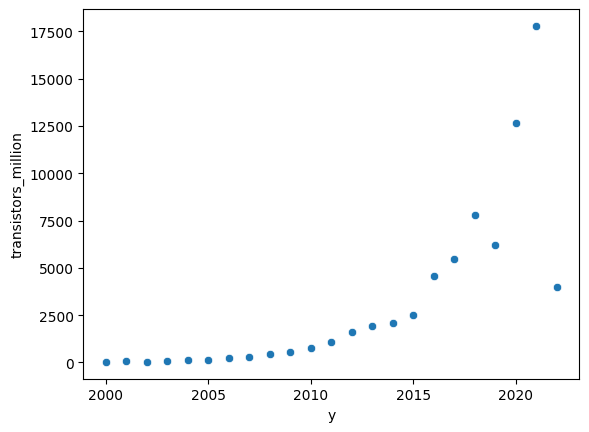

In [ ]:
sns.scatterplot(data=semiconductors, x='y', y='transistors_million')